In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Markdown, display

dataX = np.loadtxt("preprocessed_data_2/dataX.csv", delimiter=",")
dataY = np.loadtxt("preprocessed_data_2/dataY.csv", delimiter=",")

channels = ["560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm", "Temperature"]

def printHeadline(str):
    display(Markdown(f"## {str}"))

In [18]:
dataX.shape, dataY.shape

((28, 13), (28,))

## Intensity/Temperature(last) vs. Concentration. Separated by channel.

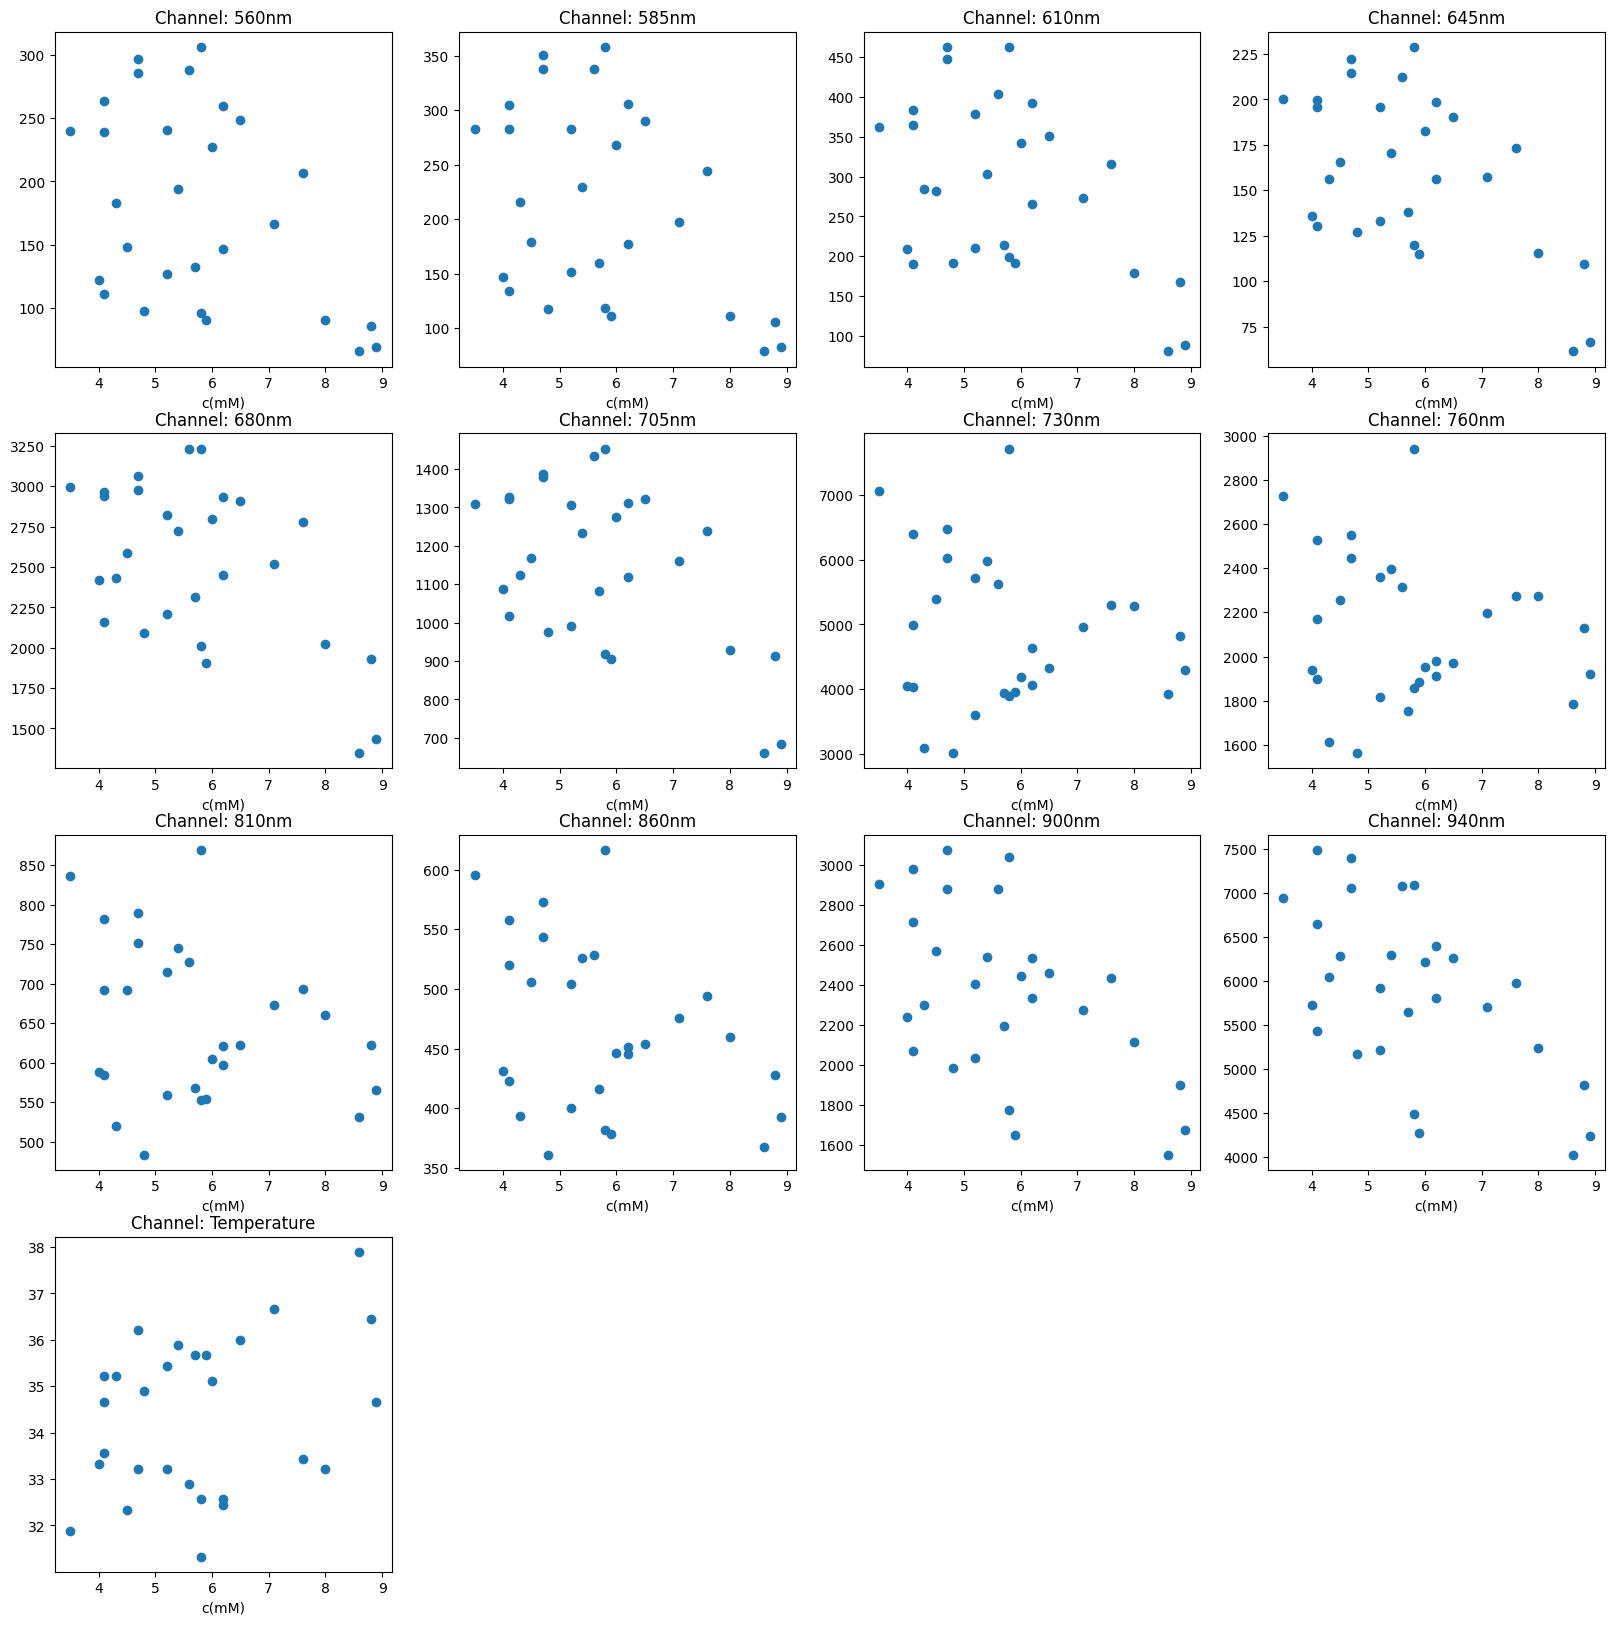

In [43]:
printHeadline("Intensity/Temperature(last) vs. Concentration. Separated by channel.")

plt.figure(figsize=(20, 20))
for ix, channel in enumerate(channels):
    
    plt.subplot(4, 4, ix + 1)
    plt.title(f"Channel: {channels[ix]}")
    plt.xlabel("c(mM)")
    plt.scatter(dataY, dataX[:, ix])
        
plt.show()
    